# Week-10

In [1]:
# getwd() #ディレクトリ確認getwd() #ディレクトリ確認

In [2]:
# # setwd() に入れる Path は上記のディレクトリの下の data ファイル
# setwd("C:/Users/iiats/OneDrive/デスクトップ/１００本ノックチャレンジ/03_R_100_knocks/Questions/data") 
# getwd() #ディレクトリ確認

In [3]:
# DataFrameの準備
# 相対パスでデータを読み込む
df <- read.csv("./data/titanic3.csv", header=T)
df2 <- read.csv("./data/data1.csv", header=T)
df3 <- read.csv("./data/data1_2.csv", header=T)
df4 <- read.csv("./data/data1_3.csv", header=T)
df5 <- read.csv("./data/data2.csv", header=T, fileEncoding = "CP932")

# タイタニック号の生存者予測 (90 - 100)  
これまで触れてきたタイタニック号の乗客データを使用して、乗客の生存有無を  
予測してみます。  
  
※90～100については順番通りにやらないと上手く動作しません

In [4]:
# 【90】ラベルエンコーディング
# df_copyのsexとembarked列をラベルエンコーディング
# (from sklearn.preprocessing import LabelEncoderをインポート)
# (df_copyはdfをコピーしたもの)

df_copy <- df
df_copy["sex"] <- lapply(df_copy["sex"], gsub, pattern="female", replacement = "1")
df_copy["sex"] <- lapply(df_copy["sex"], gsub, pattern="male", replacement = "0") # 順番を間違えると fe0 となってしまう。

df_copy["embarked"] <- lapply(df_copy["embarked"], gsub, pattern="C", replacement = "1")
df_copy["embarked"] <- lapply(df_copy["embarked"], gsub, pattern="Q", replacement = "2")
df_copy["embarked"] <- lapply(df_copy["embarked"], gsub, pattern="S", replacement = "3")

head(df_copy)

pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
1,1,"Allen, Miss. Elisabeth Walton",1,29.00,0,0,24160,211.3375,B5,3,2,NA,"St Louis, MO"
1,1,"Allison, Master. Hudson Trevor",0,0.92,1,2,113781,151.5500,C22 C26,3,11,NA,"Montreal, PQ / Chesterville, ON"
1,0,"Allison, Miss. Helen Loraine",1,2.00,1,2,113781,151.5500,C22 C26,3,,NA,"Montreal, PQ / Chesterville, ON"
1,0,"Allison, Mr. Hudson Joshua Creighton",0,30.00,1,2,113781,151.5500,C22 C26,3,,135,"Montreal, PQ / Chesterville, ON"
1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",1,25.00,1,2,113781,151.5500,C22 C26,3,,NA,"Montreal, PQ / Chesterville, ON"
1,1,"Anderson, Mr. Harry",0,48.00,0,0,19952,26.5500,E12,3,3,NA,"New York, NY"


In [5]:
head(df) # df_copy <- df で deep copy （値渡し）されている --> 【6】参照

pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NA,"St Louis, MO"
1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NA,"Montreal, PQ / Chesterville, ON"
1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,,NA,"Montreal, PQ / Chesterville, ON"
1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,,135,"Montreal, PQ / Chesterville, ON"
1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,,NA,"Montreal, PQ / Chesterville, ON"
1,1,"Anderson, Mr. Harry",male,48.00,0,0,19952,26.5500,E12,S,3,NA,"New York, NY"


In [6]:
# 【91】欠損値確認
# df_copyの欠損値を確認

colSums(is.na(df_copy)) # 【10】参照

pclass  survived      name       sex       age     sibsp     parch    ticket 
        0         0         0         0       263         0         0         0 
     fare     cabin  embarked      boat      body home.dest 
        1         0         0         0      1188         0

In [7]:
# 【92】欠損値補完
# df_copyのage、fare列の欠損値を各列の平均値で補完

# install.packages("tidyverse")
library(tidyverse)

Warning message:
"package 'tidyverse' was built under R version 3.6.3"-- Attaching packages --------------------------------------- tidyverse 1.3.0 --
√ ggplot2 3.3.2     √ purrr   0.3.2
√ tibble  3.0.3     √ dplyr   1.0.2
√ tidyr   1.1.2     √ stringr 1.4.0
√ readr   1.3.1     √ forcats 0.4.0
Warning message:
"package 'ggplot2' was built under R version 3.6.3"Warning message:
"package 'tibble' was built under R version 3.6.3"Warning message:
"package 'tidyr' was built under R version 3.6.3"Warning message:
"package 'dplyr' was built under R version 3.6.3"Warning message:
"package 'stringr' was built under R version 3.6.3"-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()


In [8]:
age_mean <- mean(df_copy$age, na.rm=TRUE) # na.rm=TRUE とすることで na を無視して平均値を計算することができる
age_mean

[1] 29.88114

In [9]:
df_copy <- replace_na(df_copy, list(age = age_mean)) # replace_na() はtidyverseの関数

In [10]:
colSums(is.na(df_copy))

pclass  survived      name       sex       age     sibsp     parch    ticket 
        0         0         0         0         0         0         0         0 
     fare     cabin  embarked      boat      body home.dest 
        1         0         0         0      1188         0

In [11]:
# 【93】不要列の削除
# df_copyの中で機械学習で使用しない不要な行を削除
# (name, ticket, cabin, boat, body, home.destを削除)

head(df_copy)

pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
1,1,"Allen, Miss. Elisabeth Walton",1,29.00,0,0,24160,211.3375,B5,3,2,NA,"St Louis, MO"
1,1,"Allison, Master. Hudson Trevor",0,0.92,1,2,113781,151.5500,C22 C26,3,11,NA,"Montreal, PQ / Chesterville, ON"
1,0,"Allison, Miss. Helen Loraine",1,2.00,1,2,113781,151.5500,C22 C26,3,,NA,"Montreal, PQ / Chesterville, ON"
1,0,"Allison, Mr. Hudson Joshua Creighton",0,30.00,1,2,113781,151.5500,C22 C26,3,,135,"Montreal, PQ / Chesterville, ON"
1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",1,25.00,1,2,113781,151.5500,C22 C26,3,,NA,"Montreal, PQ / Chesterville, ON"
1,1,"Anderson, Mr. Harry",0,48.00,0,0,19952,26.5500,E12,3,3,NA,"New York, NY"


In [12]:
df_copy <- df_copy[c(-3, -8, -10, -12, -13, -14)]
head(df_copy)

pclass,survived,sex,age,sibsp,parch,fare,embarked
1,1,1,29.00,0,0,211.3375,3
1,1,0,0.92,1,2,151.5500,3
1,0,1,2.00,1,2,151.5500,3
1,0,0,30.00,1,2,151.5500,3
1,0,1,25.00,1,2,151.5500,3
1,1,0,48.00,0,0,26.5500,3


In [13]:
colSums(is.na(df_copy))

pclass survived      sex      age    sibsp    parch     fare embarked 
       0        0        0        0        0        0        1        0

In [14]:
# fare の欠損値の行を削除しておく
df_copy <- na.omit(df_copy)
colSums(is.na(df_copy))

pclass survived      sex      age    sibsp    parch     fare embarked 
       0        0        0        0        0        0        0        0

### ここからは Caret を使って機械学習を行う  
参考：Caret tutorial  
URL：http://www.rebeccabarter.com/blog/2017-11-17-car?t_tutorial/

In [15]:
# install.packages("caret")
# install.packages("e1071")
# install.packages("MLmetrics")
# install.packages("doParallel")
# install.packages("naniar") # 欠損値処理
# install.packages("randomForest") # 機械学習アルゴリズム Random Forest
# install.packages("C50")
# install.packages("plyr")

In [16]:
# load in packages
library(caret)
library(dplyr) # データフレームの操作に特化したパッケ?[ジ
library(e1071) #パッケージ”e1071”には、いくつもの統計手法の関数が含まれる
library(MLmetrics) # Accuracy() に必要
library(naniar) # 欠損値処理
library(randomForest) # 機械学習アルゴリズム Random Forest
library(C50)
library(plyr)

Warning message:
"package 'caret' was built under R version 3.6.3"Loading required package: lattice

Attaching package: 'caret'

The following object is masked from 'package:purrr':

    lift

Warning message:
"package 'e1071' was built under R version 3.6.3"Warning message:
"package 'MLmetrics' was built under R version 3.6.3"
Attaching package: 'MLmetrics'

The following objects are masked from 'package:caret':

    MAE, RMSE

The following object is masked from 'package:base':

    Recall

Warning message:
"package 'naniar' was built under R version 3.6.3"Warning message:
"package 'randomForest' was built under R version 3.6.3"randomForest 4.6-14
Type rfNews() to see new features/changes/bug fixes.

Attaching package: 'randomForest'

The following object is masked from 'package:dplyr':

    combine

The following object is masked from 'package:ggplot2':

    margin

Warning message:
"package 'C50' was built under R version 3.6.3"------------------------------------------------------

In [17]:
# 並列化演算を行う
# https://logics-of-blue.com/r%E3%81%AB%E3%82%88%E3%82%8B%E6%A9%9F%E6%A2%B0%E5?AD%A6%E7%BF%92%EF%BC%9Acaret%E3%83%91%E3%83%83%E3%82%B1%E3%83%BC%E3%82%B8%E3%81%AE%E4%BD%BF%E3%81%84%E6%96%B9/
library(doParallel)
cl <- makePSOCKcluster(4)
registerDoParallel(cl)

Warning message:
"package 'doParallel' was built under R version 3.6.3"Loading required package: foreach

Attaching package: 'foreach'

The following objects are masked from 'package:purrr':

    accumulate, when

Loading required package: iterators
Loading required package: parallel


### 学習用データの準備

In [18]:
# 学習用データと検証用データの作成
set.seed(256)
trainIndex <- createDataPartition(df_copy$survived, p = .8, 
                                  list = FALSE, 
                                  times = 1)

In [19]:
df_train <- df_copy[ trainIndex,]
df_test  <- df_copy[-trainIndex,]

In [20]:
print(dim(df_train))
print(dim(df_test))

[1] 1047    8
[1] 261   8


### 機械学習

In [21]:
# 学習用データと検証用データの行数確認
cat("train=", nrow(df_train), " test=", nrow(df_test))

train= 1047  test= 261

In [22]:
# install.packages("tictoc") # 実行時間の測定のため
library(tictoc)

### 1. Random Forest

In [23]:
# install.packages("randomForest") # 機械学習アルゴリズム Random Forest
library(randomForest) # 機械学習アルゴリズム Random Forest

In [24]:
# fit a random
tic()
model_rf <- train(as.factor(survived) ~ ., # 関数as.factor( )を使うことによって，factor型を変換
                data = df_train, 
                method = 'rf')
toc()

11.99 sec elapsed


In [25]:
model_rf 

Random Forest 

1047 samples
   7 predictor
   2 classes: '0', '1' 

No pre-processing
Resampling: Bootstrapped (25 reps) 
Summary of sample sizes: 1047, 1047, 1047, 1047, 1047, 1047, ... 
Resampling results across tuning parameters:

  mtry  Accuracy   Kappa    
  2     0.8044025  0.5729484
  5     0.7926865  0.5576918
  9     0.7792594  0.5325938

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was mtry = 2.

In [26]:
pred <- predict(model_rf, df_test)
pred

[1] 1 0 0 0 0 0 0 1 1 0 0 1 1 0 0 0 1 0 1 0 0 0 1 0 1 1 0 0 0 0 0 1 0 0 1 0 1
 [38] 1 0 0 0 0 0 1 0 0 0 1 1 1 0 1 0 0 1 1 1 0 1 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0
 [75] 1 0 0 1 0 0 1 1 1 0 1 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 1 0 1 0 0 1 1 0 1 1
[112] 1 1 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1 1 0 1 1 0 0 1 0 0 0 0 0
[149] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[186] 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0 1 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0
[223] 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
[260] 0 0
Levels: 0 1

In [27]:
confusionMatrix(pred, as.factor(df_test$survived)) # 比較するデータのlevelを合わせないとエラーが出る

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 154  38
         1  13  56
                                          
               Accuracy : 0.8046          
                 95% CI : (0.7512, 0.8509)
    No Information Rate : 0.6398          
    P-Value [Acc > NIR] : 4.782e-09       
                                          
                  Kappa : 0.5499          
                                          
 Mcnemar's Test P-Value : 0.0007775       
                                          
            Sensitivity : 0.9222          
            Specificity : 0.5957          
         Pos Pred Value : 0.8021          
         Neg Pred Value : 0.8116          
             Prevalence : 0.6398          
         Detection Rate : 0.5900          
   Detection Prevalence : 0.7356          
      Balanced Accuracy : 0.7590          
                                          
       'Positive' Class : 0               
                              

In [28]:
Accuracy(pred, df_test$survived)

[1] 0.8045977

In [29]:
# グラフの出力サイズの設定
# https://stackoverrun.com/ja/q/11752310
options(repr.plot.width = 3, repr.plot.height = 2) 

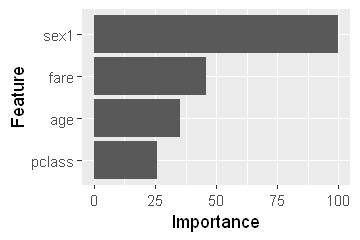

In [30]:
# 特徴量の重要度
# pipeline 表記
model_rf %>% 
  varImp() %>% 
  ggplot(top = 4)

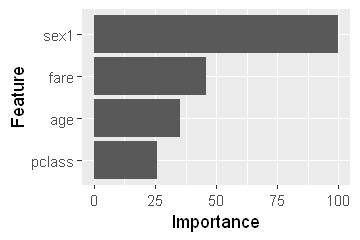

In [31]:
vi <- varImp(model_rf) 
ggplot(vi, top = 4)

In [32]:
print(vi)

rf variable importance

          Overall
sex1      100.000
fare       45.910
age        35.394
pclass     25.647
sibsp      11.394
parch      10.590
embarked1   5.825
embarked3   2.898
embarked2   0.000


### 2. Support Vector Machin (Kernel法)

In [33]:
# install.packages("kernlab") 
library(kernlab)


Attaching package: 'kernlab'

The following object is masked from 'package:purrr':

    cross

The following object is masked from 'package:ggplot2':

    alpha



In [34]:
# fit a random
tic()
model_sv <- train(as.factor(survived) ~ ., # 関数as.factor( )を使うことによって，factor型を変換
                data = df_train, 
                method = 'svmPoly',
                preProcess = c("center","scale"))
toc()

14.67 sec elapsed


In [35]:
model_sv

Support Vector Machines with Polynomial Kernel 

1047 samples
   7 predictor
   2 classes: '0', '1' 

Pre-processing: centered (9), scaled (9) 
Resampling: Bootstrapped (25 reps) 
Summary of sample sizes: 1047, 1047, 1047, 1047, 1047, 1047, ... 
Resampling results across tuning parameters:

  degree  scale  C     Accuracy   Kappa     
  1       0.001  0.25  0.6135516  0.00000000
  1       0.001  0.50  0.6199619  0.02057128
  1       0.001  1.00  0.7295481  0.35644820
  1       0.010  0.25  0.7874101  0.54515059
  1       0.010  0.50  0.7864733  0.54282657
  1       0.010  1.00  0.7864733  0.54282657
  1       0.100  0.25  0.7864733  0.54282657
  1       0.100  0.50  0.7864733  0.54282657
  1       0.100  1.00  0.7864733  0.54282657
  2       0.001  0.25  0.6202691  0.02166470
  2       0.001  0.50  0.7297499  0.35700498
  2       0.001  1.00  0.7876328  0.54561381
  2       0.010  0.25  0.7864733  0.54282657
  2       0.010  0.50  0.7876188  0.54504383
  2       0.010  1.00  0.7903946 

In [36]:
pred <- predict(model_sv, df_test)
pred

[1] 1 0 0 0 0 0 0 1 1 0 0 1 1 0 0 0 1 0 1 0 0 0 1 0 1 1 0 0 0 0 0 1 0 0 1 0 1
 [38] 1 0 0 0 0 0 1 0 0 0 1 1 1 0 1 0 0 0 1 1 0 1 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0
 [75] 1 0 0 1 0 0 1 1 1 0 1 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 1 0 1 1
[112] 1 1 0 1 0 1 1 0 1 1 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1 1 0 1 1 1 0 1 0 0 0 0 0
[149] 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
[186] 1 1 1 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 1 1 0 0 1 0 0 0 0 1 0 1 1 0 0 0 0 0 0
[223] 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0
[260] 0 0
Levels: 0 1

In [37]:
confusionMatrix(pred, as.factor(df_test$survived)) # 比較するデータのlevelを合わせないとエラーが出る

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 146  36
         1  21  58
                                          
               Accuracy : 0.7816          
                 95% CI : (0.7265, 0.8302)
    No Information Rate : 0.6398          
    P-Value [Acc > NIR] : 5.203e-07       
                                          
                  Kappa : 0.509           
                                          
 Mcnemar's Test P-Value : 0.06369         
                                          
            Sensitivity : 0.8743          
            Specificity : 0.6170          
         Pos Pred Value : 0.8022          
         Neg Pred Value : 0.7342          
             Prevalence : 0.6398          
         Detection Rate : 0.5594          
   Detection Prevalence : 0.6973          
      Balanced Accuracy : 0.7456          
                                          
       'Positive' Class : 0               
                              

In [38]:
Accuracy(pred, df_test$survived)

[1] 0.7816092

Warning message:
"Removed 1 rows containing missing values (position_stack)."

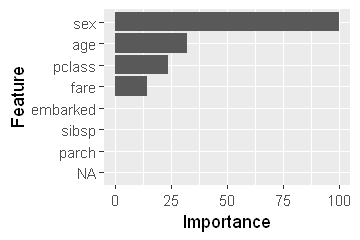

In [39]:
# 特徴量の重要度
model_sv %>% 
  varImp() %>% 
  ggplot(top = 8)